# 引入函式庫

In [ ]:

%matplotlib inline
#basic tools


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from itertools import product,permutations,combinations
#R2
from sklearn.metrics import mean_squared_error, r2_score
#degree
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#import Lasso and LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
#import KNN
from sklearn.neighbors import NearestNeighbors
#k折-交叉驗證
from sklearn.model_selection import GridSearchCV, KFold

import random
import matplotlib.pyplot as plt
import scipy.optimize as optimization
import statistics
import gc

from sklearn import metrics

plt.rcParams["figure.figsize"] = (8,6) # (w, h)
plt.rcParams["figure.dpi"] = 100

# 實驗1:生成隨機點

In [ ]:
#generate datas
m = 45
x = 2 * np.random.rand(m)
#generate linear datas
y = 10 + 2 * x + np.random.randn(m)
data = np.vstack((x, y)).T
LSM = LinearRegression()
x = np.reshape(x,(-1,1))
y = np.reshape(y,(-1,1))
model_LSM = LSM.fit(x,y)


#add outliers
m1 = 5
x1 = np.random.rand(m1)
y1 = np.random.rand(m1)
data_outliers = np.vstack((x1, y1)).T


In [ ]:
data = pd.read_csv('test.csv')
data = np.array(data)
print(np.shape(data))
X , y = data.T
print(X)
x = np.reshape(X[:45],(-1))

m = 45
m1 = 5

x1 = np.reshape(X[45:],(-1,1))
y1 = np.reshape(y[45:],(-1,1))
y = np.reshape(y[:45],(-1))

data_outliers = np.vstack((x1, y1))
data_outliers = np.reshape(data_outliers,(2,-1)).T
print(data_outliers)

(50, 2)
[0.38319599 1.63846956 1.16738666 0.83118263 0.54594389 1.74514487
 0.1350819  0.11937419 1.71395625 1.05093622 1.08100133 1.35545657
 1.8553069  0.77151055 1.34906982 1.38525346 0.42479061 1.50978688
 1.83297436 0.47997551 1.16057824 0.74533333 1.42665537 1.44483765
 0.68810586 0.78781459 0.24637422 0.1203063  1.04399147 0.03158096
 0.80371734 0.496061   0.69590566 1.85910381 1.71544398 1.31346892
 0.64697764 0.05252014 0.11817764 0.67333762 1.77747775 0.04924443
 0.6104413  1.91162147 1.0680323  0.04213385 0.74887817 0.71528517
 0.02990203 0.94322365]
[[0.04213385 0.28311417]
 [0.74887817 0.81039921]
 [0.71528517 0.81807451]
 [0.02990203 0.90565835]
 [0.94322365 0.26635047]]


drawing

[Without outliers] intercept: 10.011, slope: 2.090
[With outliers]    intercept: 7.908, slope: 3.259


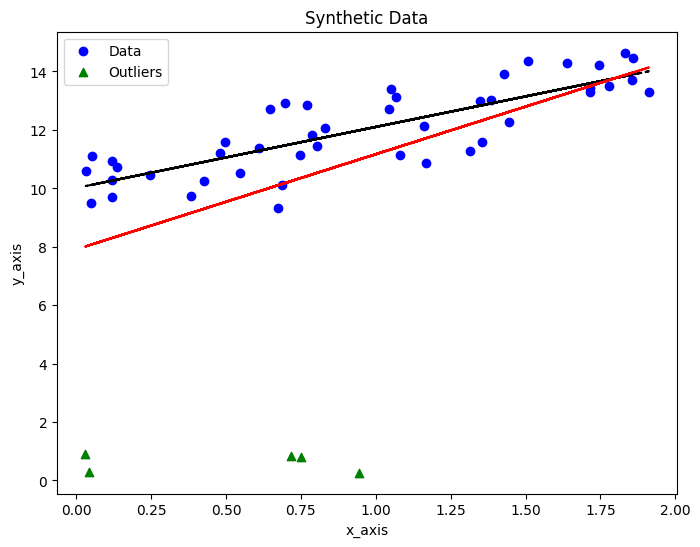

In [ ]:
plt.clf()




x1, y1 = data_outliers.T
p1 = plt.scatter(x,y,color = 'blue')
p2 = plt.scatter(x1,y1,color ='g',marker = '^')
plt.legend([p1, p2], ['Data','Outliers'], loc='upper left', scatterpoints=1)
p_point = plt.legend([p1, p2], ['Data','Outliers'], loc='upper left', scatterpoints=1)

#collect all data
data_comb = data
x_, y_ = data_comb.T

# Initial thelda --> thelda0,thelda1
thelda = np.zeros(2)
thelda_ = np.zeros(2)

# X=[1,x0],[1,x1],...

X = np.array([np.ones(m), x]).T
X_ = np.array([np.ones(m+m1), x_]).T

def func(params, xdata, ydata):
    return (ydata - np.dot(xdata,params))

#Without outliers
ls_result = optimization.leastsq(func, thelda, args=(X,y))
intercept = ls_result[0][0]
slope = ls_result[0][1]
print(f"[Without outliers] intercept: {intercept:.3f}, slope: {slope:.3f}")
plt.plot(x, slope*x + intercept,'k--',label = 'Without outliers')

#With outliers
ls_result_ = optimization.leastsq(func, thelda_, args=(X_,y_))
intercept_ = ls_result_[0][0]
slope_ = ls_result_[0][1]
print(f"[With outliers]    intercept: {intercept_:.3f}, slope: {slope_:.3f}")
plt.plot(x_, slope_*x_ + intercept_,'red',label = 'With outliers')
plt.title('Synthetic Data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

plt.show()



X , y = data.T
X = np.reshape(x_,(1,-1))
y = np.reshape(y_,(1,-1))
o_x = X[:45]
o_y = y[:45]
o_data = np.vstack((o_x,o_y))

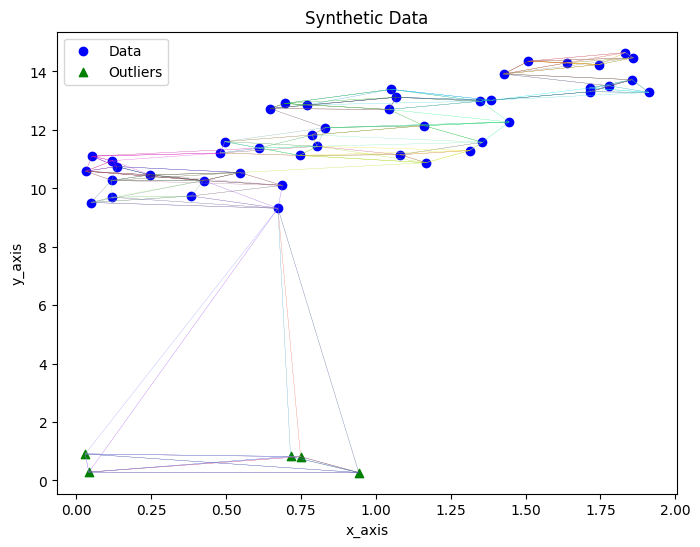

In [ ]:
plt.clf()
o_x = np.reshape(o_x,(-1))[:45]
o_y = np.reshape(o_y,(-1))[:45]
k = 6
data = np.vstack((X,y)).T

#make connect line different colors
number_of_colors = m+m1
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],color=color[p1],linewidth=0.2)

k = 6 #include self
result = NearestNeighbors(n_neighbors=k)
result.fit(data)

i=0
j=1

while i < m+m1:
    while j < k:
        connectpoints(x_,y_,i,result.kneighbors([data[i]])[1][0][j])
        j=j+1
    i=i+1
    j=1

plt.title('Synthetic Data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
p1 = plt.scatter(o_x,o_y,color = 'blue')
p2 = plt.scatter(x1,y1,color ='g',marker = '^')
plt.legend([p1, p2], ['Data','Outliers'], loc='upper left', scatterpoints=1)
p_point = plt.legend([p1, p2], ['Data','Outliers'], loc='upper left', scatterpoints=1)

檢測到異常值，索引位置為： [49]


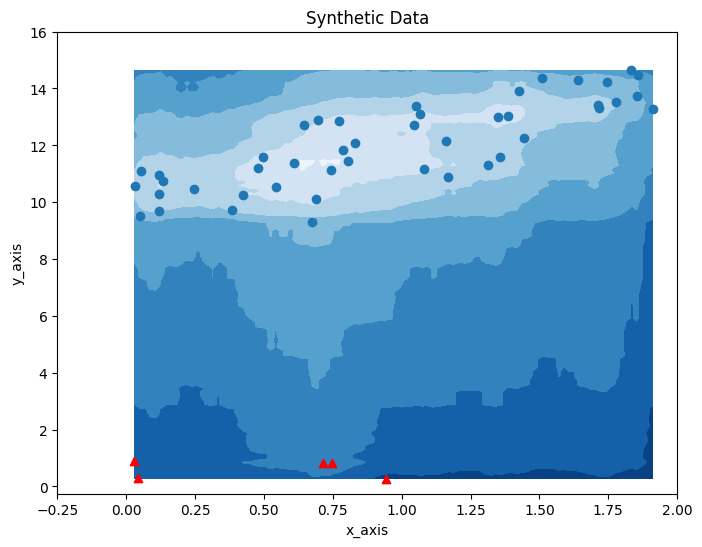

In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(data)
predict = iso_forest.predict(data)

outlier_indices = np.where(predict == -1)[0]

if outlier_indices.size > 0:
    print("檢測到異常值，索引位置為：", outlier_indices)
    # 將孤立森林的檢測結果視覺化
    xx, yy = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(y.min(), y.max(), 100))
    Z = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    plt.scatter(X[0][:45], y[0][:45],label='Data')
    plt.scatter(X[0][45:],y[0][45:],color='red',marker='^',label='Outliers')
    plt.title('Synthetic Data')
    plt.xlabel('x_axis')
    plt.ylabel('y_axis')
    plt.xlim(-0.25,2.0)
    plt.ylim(-0.25,16)
    plt.show()
else:
    print("未檢測到異常值")


# 實驗2:引入資料集並繪圖


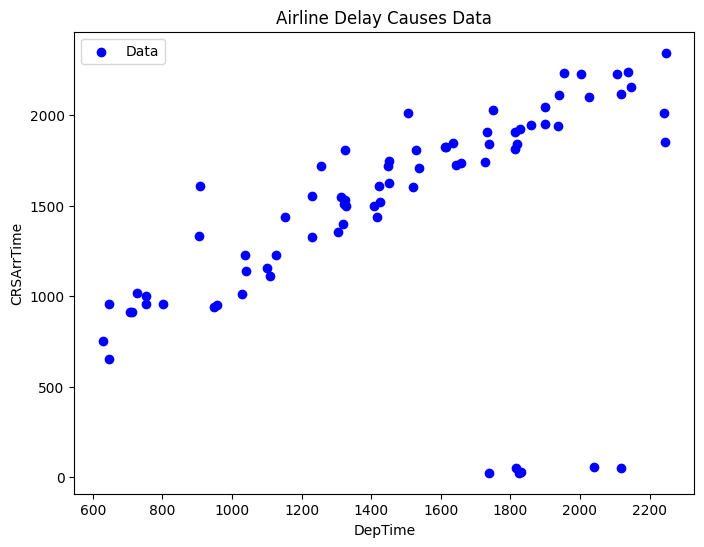

In [ ]:

data = pd.read_csv('airlinedelaycauses_DelayedFlights.csv')
X = np.array(data['DepTime'][:75])
y = np.array(data['CRSArrTime'][:75])



data = np.vstack((X,y)).T
X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1))
plt.title('Airline Delay Causes Data')
plt.xlabel('DepTime')
plt.ylabel('CRSArrTime')
plt.scatter(X,y,c='blue',label='Data')
plt.legend()
plt.show()

[[2003. 2225.]
 [ 754. 1000.]
 [ 628.  750.]
 [1829. 1925.]
 [1940. 2110.]
 [1937. 1940.]
 [ 706.  915.]
 [1644. 1725.]
 [1029. 1010.]
 [1452. 1625.]
 [ 754.  955.]
 [1323. 1510.]
 [1416. 1435.]
 [1657. 1735.]
 [1900. 1950.]
 [1039. 1140.]
 [1520. 1605.]
 [1422. 1610.]
 [1954. 2235.]
 [2107. 2230.]
 [1312. 1550.]
 [1449. 1720.]
 [1634. 1845.]
 [1812. 1815.]
 [1127. 1230.]
 [1424. 1520.]
 [1326. 1530.]
 [1749. 2030.]
 [ 726. 1020.]
 [ 646.  955.]
 [1153. 1440.]
 [1528. 1810.]
 [1450. 1745.]
 [2245. 1850.]
 [2025. 2100.]
 [1038. 1225.]
 [1900. 2045.]
 [ 948.  940.]
 [ 646.  655.]
 [1110. 1110.]
 [2139. 2240.]
 [1738. 1840.]
 [1813. 1905.]
 [ 802.  955.]
 [1734. 1905.]
 [ 712.  915.]
 [1318. 1400.]
 [ 958.  950.]
 [1859. 1945.]
 [1538. 1710.]
 [2248. 2345.]
 [1327. 1500.]
 [1614. 1825.]
 [1229. 1555.]
 [1256. 1720.]
 [ 905. 1330.]
 [1325. 1810.]
 [1506. 2010.]
 [1611. 1825.]
 [2118. 2115.]
 [1818. 1840.]
 [2146. 2155.]
 [2241. 2010.]
 [1409. 1500.]
 [1100. 1155.]
 [1306. 1355.]
 [1726. 17

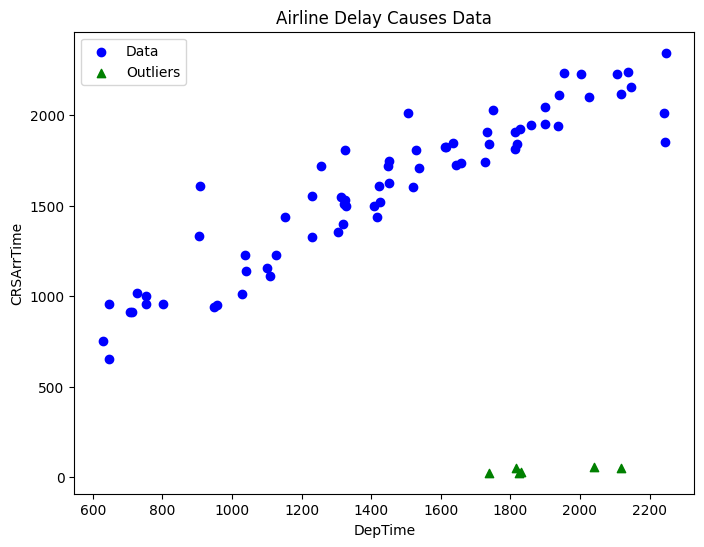

In [ ]:
o_data = np.array([])
for i in data:
  if i[1]>100:
    o_data = np.append(o_data,i)
o_data = np.reshape(o_data,(-1,2))
print(o_data)
o_x , o_y = o_data.T

data_outliers = np.array([])
for i in data:
  if i[1]<100:
    data_outliers = np.append(data_outliers,i)
data_outliers = np.reshape(data_outliers,(-1,2))
print(data_outliers)
x1 , y1 = data_outliers.T

x_ = X
y_ = y
m = len(o_x)
m1 = len(x1)



data = np.vstack((X,y)).T
X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1))
plt.title('Airline Delay Causes Data')
plt.xlabel('DepTime')
plt.ylabel('CRSArrTime')
plt.scatter(o_x,o_y,c='blue',label='Data')
plt.scatter(x1,y1,color='green',label='Outliers',marker='^')
plt.legend()
plt.show()

# 分治法(Freezing)

In [ ]:
# Define the function to calculate the distance between two datas.
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

data = np.vstack((X,y)).T
n = int(1E+3)  # Test times
times = 25

ds = [[0,0] for i in range(n)]  # Initialize ds with zeros
def is_in_range(lst:list, lower, upper):
    for element in lst:
        if lower <= element <= upper:
            return True
    return False

for i in range(n):
    #Find three diffrent point
    a_point = [0 for i in range(times)]
    for k in range(times):
          a_point[k] = random.randint(0,len(data)-1)
    while len(set(a_point))!=len(a_point):
        for k in range(times):
          a_point[k] = random.randint(0,len(data)-1)

    #calculate their total distance
    for k in range(len(a_point)-1):
        ds[i][0] += distance(data[a_point[k]][0], data[a_point[k]][1], data[a_point[k+1]][0], data[a_point[k+1]][1])

    ds[i][1] = a_point
# Convert ds to a DataFrame
df = pd.DataFrame(ds, index=[f'test_{i+1}' for i in range(n)], columns=['sum_distance','points'])

ap = df['sum_distance'].sum()


print(df)

def Wg(a1,total):
  return 1 - round(a1/total,6)


A_Q = np.zeros((50))

for i in range(n):
  wg = Wg(df['sum_distance'][i],ap)
  for j in df['points'][i]:
    A_Q[j] += wg
print(A_Q)
plt.plot(range(50),A_Q)

plt.show()

In [ ]:
choose = []
for i in range(len(A_Q)):
  if A_Q[i] >= statistics.median(A_Q):
    choose.append(i)

人工補正(截圖不要截到我)

In [ ]:
#不要看我 我才不是甚麼正確的程式碼
ps = []
for i in choose:
  if i < 44:
    ps.append(i)
choose = ps
del ps
gc.collect()
print(choose)

# 計算距離(Freezing)

In [ ]:
data = np.vstack((X,y)).T
#計算距離
k = np.shape(data)[0]
result = NearestNeighbors(n_neighbors=k)
result.fit(data)
graph = np.zeros((k,k))

for i in range(k):
    c_k = np.array(list(data[i][L] for L in range(np.shape(data)[1])))
    c_k = c_k.reshape(1,-1)
    d_list , i_list = result.kneighbors(c_k)[0] ,  result.kneighbors(c_k)[1]
    i_list , d_list = i_list[0] , d_list[0]
    x = 0
    for j in i_list:
      graph[i][j] = d_list[x]
      if i == j :
        graph[i][j] = float('inf')
      x += 1
print(graph)

# 改良dijkstra演算法(使用動態規劃)(Freezing)

In [ ]:
#動態規劃演算法(舊)(1.0)
def dp(start, stop, num , df):
    INF = float("inf")
    num_p = len(df)
    ans = 'error : update is not work'
    table = np.zeros((num_p,num_p))   # 最初化表格
    table.fill(INF)

    for p_A in range(num_p):
        for p_B in range(p_A+1, num_p):
          total_distance = calculate_total_distance(start, stop, p_A, p_B)
          table[p_A][p_B] = min([table[p_A-1][p_B],table[p_A][p_B-1],total_distance])
          if table[p_A][p_B] == total_distance:
            ans = [p_A,p_B]


    return ans , table[num_p-2][num_p-1]

def calculate_total_distance(start, end, point_A, point_B):
    total_distance = graph[start][point_A] + graph[point_A][point_B] + graph[point_B][end]
    return total_distance


choose = [18,12]
start = time.time()
ans , res = dp(choose[0],choose[1],2,graph)
end = time.time()
print(f"choose point{ans}")
print(f"sum dis:{res}")
print(f"time:{end-start}s")

for i in range(len(ans)):
  choose.append(ans[i])

In [ ]:
#動態規劃演算法(新，慢)(2.0)
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def dp(n, df):
    indices = list(range(len(df)))
    best_distance = np.inf
    best_combination = None

      for perm in permutations(indices, r=n):
          total_distance = 0
          for i in range(n - 1):
              total_distance += distance(df[perm[i]][0], df[perm[i]][1], df[perm[i + 1]][0], df[perm[i + 1]][1])

          if total_distance < best_distance:
              best_distance = total_distance
              best_combination = perm

      return best_distance, best_combination

data = np.vstack((X, y)).T
choose = []
n = 4  # choose n datas

start = time.time()
res, ans = dp(n, data)
end = time.time()

print(f"choose point {ans}")
print(f"sum dis: {res}")
print(f"time: {end - start}s")
for i in range(len(ans)):
    choose.append(ans[i])


In [ ]:
#大概是最終版本吧我猜(3.0)

def find_min(lst, a, df):
    if len(lst) == 0:
      return None , 0
    # lst does not include start and end
    # a means target
    # df is the original datasets
    k = len(lst)
    result = NearestNeighbors(n_neighbors=1)
    memo = np.zeros((len(lst), 2))
    n = 0
    for i in lst:
        print(n)
        memo[n][0] = df[i][0]
        memo[n][1] = df[i][1]
        n += 1

    result.fit(memo)
    #最近的點和其距離
    return lst[result.kneighbors(df[a].reshape(1, -1))[1][0][0]], result.kneighbors(df[a].reshape(1, -1))[0][0][0]


def dp(n, df):
    indices = list(range(len(df)))
    best_distance = np.inf
    best_combination = None

    for comb in combinations(indices,r=n):
      dp_list = np.zeros((n,n))
      dp_list.fill(np.inf)
      for i in range(n):
        for j in range(n):
          _queue = []
          if i == j :
            continue
          if dp_list[i][j] == np.inf:
            dp_list[i][j] = 0
          tem_comb = comb
          tem_comb.remove(comb[j])
          tem_comb.remonve(comb[i])
          cho_point , X_0 = find_min(tem_comb,comb[j],data)
          dp_list[i][j] += X_0
          _queue.append(comb[j])
          _queue.append(cho_point)
          while len(tem_comb) != 0:
            tem_comb.remove(cho_point)
            cho_point , X_0 = find_min(tem_comb,cho_point,data)
            dp_list[i][j] += X_0
            _queue.append(cho_point)
          _queue.append(comb[i])
          cho_point , X_0 = find_min([comb[i]],_queue[-2],data)
          dp_list[i][j] += X_0
          if dp_list[i][j]< best_distance:
            best_distance = dp_list[i][j]
            best_combination = _queue

    return best_distance, best_combination



# Example data
data = np.vstack((X, y)).T
choose = []
n = 4  # Choose n data points

start = time.time()
res, ans = dp(n, data)
end = time.time()

# Print results
print(f"Choose points {ans}")
print(f"Total distance: {res}")
print(f"Time: {end - start}s")
for i in range(len(ans)):
    choose.append(ans[i])


# 有向圖製作(使用K-NN)(Freezing)

In [ ]:
data = np.vstack((X,y)).T
#計算距離
k = int(len(data)/2)
result = NearestNeighbors(n_neighbors=k)
result.fit(data)
graph = np.zeros((len(data),2,k))

for i in range(len(data)):
  a = np.array(result.kneighbors(data[i].reshape((1,-1)))[0])
  b = np.array(result.kneighbors(data[i].reshape((1,-1)))[1])
  graph[i][0],graph[i][1] = a , b
for i in range(len(data)):
  graph[i][0][0] = np.inf
for i in range(len(data)):
  for j in range(len(graph[i][1])):
    graph[i][1][j] = int(graph[i][1][j])
print(graph)

# 改良dijkstra算法(Freezing)

In [ ]:
#得到的結果會是A與其他節點最短距離
def dijkstra(graph, start, k):
  INF = np.inf
  visited = []
  index = start
  nodes = dict((i, INF) for i in range(len(graph)))        # 設定節點為最大值
  nodes[start] = 0                           # 設定起點為start
  path = {i: [] for i in range(len(graph))}             # 用來存儲每個節點的路徑
  Check_node = []
  pointer = index



  while len(visited) < len(graph):                  # 有幾個節點就執行幾次
    visited.append(index)
    a = 0

    for i in graph[index][1]:
      Check_node.append(index)
      pointer = i
      new_cost = 0
      temporary_position = []
      temporary_position.append(pointer)
      while len(Check_node) != k:
        bi = 0
        for ci in graph[int(pointer)][1]:

          if ci in temporary_position:
            bi += 1
            continue
          else:
            temporary_position.append(ci)
            Check_node.append(ci)
            new_cost += graph[int(pointer)][0][int(bi)]    #新路徑距離
            pointer = ci
            break

          bi += 1
      if  new_cost < nodes[i]:             # 新路徑如果比較短
          nodes[i] = new_cost            # 採用新路徑
          path[i] = Check_node  # 更新節點的路徑

      a += 1
      Check_node = []
    next = INF
    for n in nodes:                     # 從串列中找出下一個節點
      if n in visited:                 # 如果已拜訪回到for選下一個
          continue
      if nodes[n] < next:               # 找出新的最小權重節點
          next = nodes[n]
          index = n
  return nodes , path



rtn1,rtn2 = dijkstra(graph,0,25)

del rtn1[0]
del rtn2[0]

print(rtn1)
print(rtn2)
min_sum = min(rtn1.values())

print()
for key, value in rtn1.items():
    if value == min_sum:
        needy = key
        break
choose = rtn2[needy]
print(choose)
print(min_sum)
#如果發現點數不夠，回去找下一個節點

# 繪圖(Freezing)

In [ ]:
ggs = np.zeros((len(choose),2))
num = 0
X = X.reshape((-1,1))
y = y.reshape((-1,1))
for i in choose:
  ggs[num][0] = X[int(i)][0]
  ggs[num][1] = y[int(i)][0]
  num += 1
ggs = ggs.T
new_x = ggs[0].reshape((-1,1))
new_y = ggs[1].reshape((-1,1))




#Model
model = LinearRegression()
model.fit(new_x,new_y)
print(f"[dijkstra] intercept:{model.intercept_[0]:.3f}, slope:{model.coef_[0][0]:.3f}")
predict = model.predict(X.reshape((-1,1)))
predict = predict.reshape((-1,1))

# 計算RMSE和R²
rmse_poly_ridge = np.sqrt(mean_squared_error(y, predict))
r2_poly_ridge = r2_score(y, predict)


plt.scatter(X,y,color= 'blue')
plt.scatter(new_x,new_y,c='red')

plt.plot(X,predict,color= 'black')
plt.xlabel("x_axis")
plt.ylabel("y_axis")
plt.title(f'Random datas test(data size={np.shape(X.T)})\nRMSE={round(rmse_poly_ridge,2)}\nr2={round(r2_poly_ridge,2)}')

plt.show()

# 儲存數據(Freezing)

In [ ]:
test_data = pd.read_csv('test.csv')
print(test_data)

In [ ]:
X = np.reshape(X,(-1,1)).T
y = np.reshape(y,(-1,1)).T
data = np.vstack((X,y)).T

cache = pd.DataFrame(data)
cache.to_csv('test.csv',index= False)
del cache


In [ ]:
print(np.shape(X))

# 線性數據實驗

分治實驗

實驗一 測試RMSE和R2

rmse:1.4722331391785857
r2:0.019209926228394236


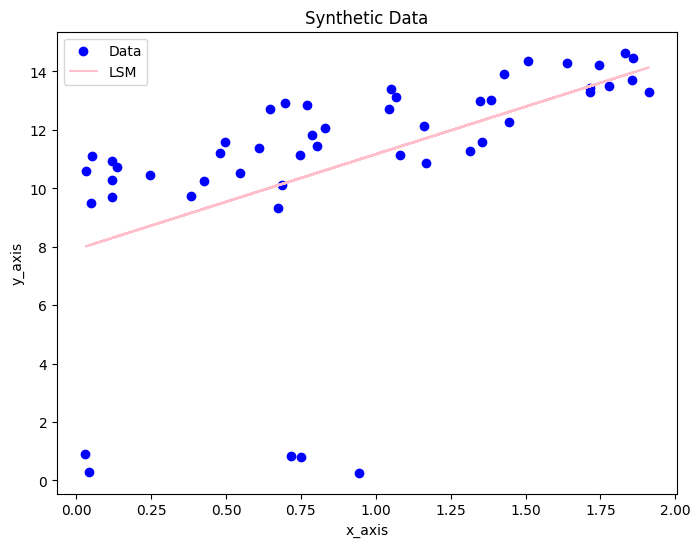

In [ ]:
#LSM
X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1))
o_x = np.reshape(o_x,(-1,1))
o_y = np.reshape(o_y,(-1,1))

LSM = LinearRegression()
model_LSM = LSM.fit(X,y)
predict = model_LSM.predict(o_x)
# 計算RMSE和R²
rmse_p = np.sqrt(mean_squared_error(o_y, predict))
r2_p = r2_score(o_y, predict)

print(f'rmse:{rmse_p}')
print(f'r2:{r2_p}')


plt.scatter(X,y,c='blue',label='Data')
plt.plot(o_x,predict,c='pink',label='LSM')

plt.title('Synthetic Data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.legend()
plt.show()

rmse:1.410546883130522
r2:0.09967785064588386


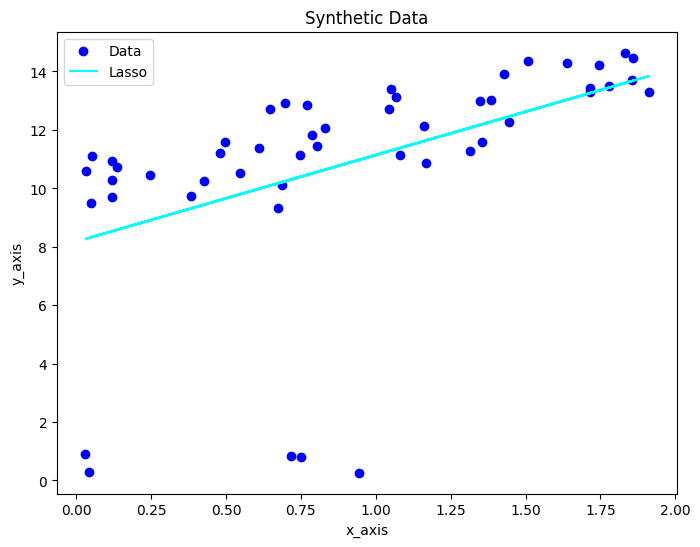

In [ ]:
#Lasso
X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1))
o_x = np.reshape(o_x,(-1,1))
o_y = np.reshape(o_y,(-1,1))


Ls = Lasso()
param_grid = {'alpha': [1E-4,1E-3,1E-2,1E-1,1E+0,1E+1,1E+2,1E+3,1E+4]} #視情況加入梯度下降
kfold = KFold(n_splits=10, shuffle=True, random_state=40)
grid_search = GridSearchCV(Ls, param_grid, cv=kfold)
grid_search.fit(X,y)



Ls = Lasso(alpha=grid_search.best_params_['alpha'])
model_Lasso = Ls.fit(X,y)
predict = model_Lasso.predict(o_x)
# 計算RMSE和R²
rmse_p = np.sqrt(mean_squared_error(o_y, predict))
r2_p = r2_score(o_y, predict)

print(f'rmse:{rmse_p}')
print(f'r2:{r2_p}')
plt.scatter(X,y,c='blue',label='Data')
plt.plot(o_x,predict,c='cyan',label='Lasso')

plt.title('Synthetic Data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.legend()
plt.show()

rmse:1.4321289210507078
r2:0.0719163672955434


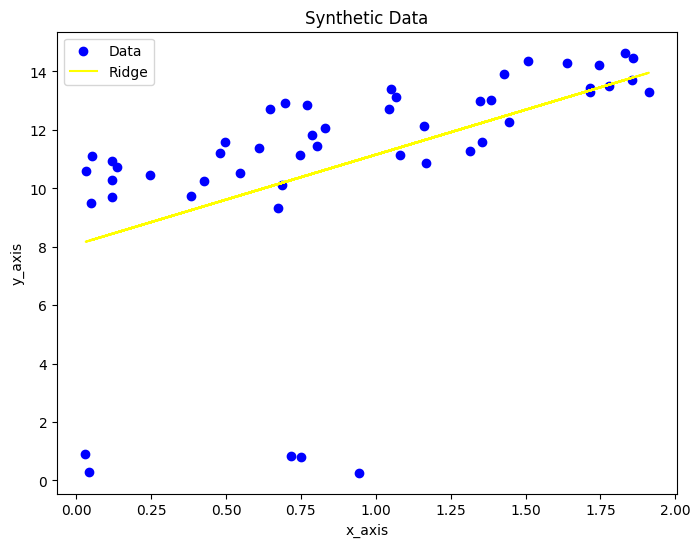

In [ ]:
#Ridge
X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1))
o_x = np.reshape(o_x,(-1,1))
o_y = np.reshape(o_y,(-1,1))


Ls = Ridge()
param_grid = {'alpha': [1E-4,1E-3,1E-2,1E-1,1E+0,1E+1,1E+2,1E+3,1E+4]} #視情況加入梯度下降
kfold = KFold(n_splits=10, shuffle=True, random_state=40)
grid_search = GridSearchCV(Ls, param_grid, cv=kfold)
grid_search.fit(X,y)



Ls = Ridge(alpha=grid_search.best_params_['alpha'])
model_Ridge = Ls.fit(X,y)
predict = model_Ridge.predict(o_x)
# 計算RMSE和R²
rmse_p = np.sqrt(mean_squared_error(o_y, predict))
r2_p = r2_score(o_y, predict)

print(f'rmse:{rmse_p}')
print(f'r2:{r2_p}')
plt.scatter(X,y,c='blue',label='Data')
plt.plot(o_x,predict,c='yellow',label='Ridge')

plt.title('Synthetic Data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.legend()
plt.show()

           sum_distance                                             points
test_1        57.190244  [36, 6, 20, 27, 48, 24, 44, 34, 7, 41, 0, 33, ...
test_2        56.033185  [29, 30, 10, 23, 1, 13, 5, 43, 37, 42, 16, 14,...
test_3        75.350156  [37, 25, 48, 10, 30, 42, 24, 12, 44, 5, 23, 27...
test_4       104.574608  [11, 39, 1, 3, 30, 43, 22, 38, 29, 18, 8, 13, ...
test_5        83.556082  [30, 4, 18, 38, 22, 15, 3, 47, 35, 26, 12, 31,...
...                 ...                                                ...
test_996      93.405467  [49, 12, 25, 19, 2, 7, 26, 41, 4, 33, 37, 42, ...
test_997     112.413997  [39, 49, 27, 12, 2, 42, 45, 4, 5, 3, 41, 13, 7...
test_998      88.213573  [30, 1, 40, 8, 22, 2, 10, 27, 32, 35, 28, 46, ...
test_999      87.188177  [48, 14, 18, 4, 34, 32, 39, 26, 35, 15, 36, 6,...
test_1000     77.617193  [6, 20, 11, 12, 14, 44, 19, 40, 2, 42, 48, 32,...

[1000 rows x 2 columns]
rmse:0.908792979645529
r2:0.6262744322293916


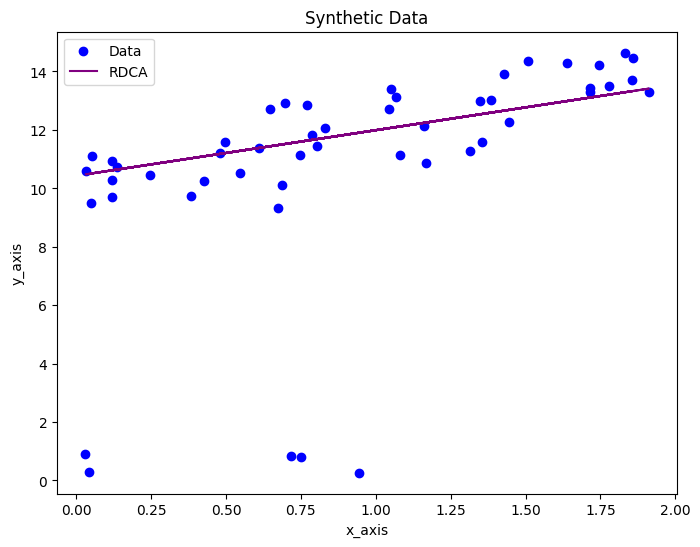

In [ ]:
##RDCA
# Define the function to calculate the distance between two datas.
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
X = np.reshape(X,(1,-1))
y = np.reshape(y,(1,-1))
data = np.vstack((X,y)).T
n = int(1E+3)  # Test times
times = 25

ds = [[0,0] for i in range(n)]  # Initialize ds with zeros
def is_in_range(lst:list, lower, upper):
    for element in lst:
        if lower <= element <= upper:
            return True
    return False

for i in range(n):
    #Find three diffrent point
    a_point = [0 for i in range(times)]
    for k in range(times):
          a_point[k] = random.randint(0,len(data)-1)
    while len(set(a_point))!=len(a_point):
        for k in range(times):
          a_point[k] = random.randint(0,len(data)-1)

    #calculate their total distance
    for k in range(len(a_point)-1):
        ds[i][0] += distance(data[a_point[k]][0], data[a_point[k]][1], data[a_point[k+1]][0], data[a_point[k+1]][1])

    ds[i][1] = a_point
# Convert ds to a DataFrame
df = pd.DataFrame(ds, index=[f'test_{i+1}' for i in range(n)], columns=['sum_distance','points'])


print(df)

def Wg(mean,std,distance):
  return (mean+std-distance)/ (2*std)




A_Q = np.zeros((m+m1,2))

for i in range(n):
  for j in df['points'][i]:
    A_Q[j][0] += df['sum_distance'][i]
    A_Q[j][1] += 1

set_d = A_Q.T[0]/A_Q.T[1]
mu_s = np.mean(set_d)
std_s = np.std(set_d)
wg = np.zeros((m+m1))
for i in range(m+m1):
  wg[i] = Wg(mu_s,std_s,set_d[i])



choose = []
for i in range(len(wg)):
  if wg[i] >= statistics.median(wg):
    choose.append(i)


'''ps = []
for i in choose:
  if i < 44:
    ps.append(i)
choose = ps
del ps
gc.collect()
print(choose)'''


ggs = np.zeros((len(choose),2))
num = 0
X = X.reshape((-1,1))
y = y.reshape((-1,1))
for i in choose:
  ggs[num][0] = X[int(i)][0]
  ggs[num][1] = y[int(i)][0]
  num += 1
ggs = ggs.T
new_x = ggs[0].reshape((-1,1))
new_y = ggs[1].reshape((-1,1))



X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1))
#Model
model_RDCA = LinearRegression()
model_RDCA.fit(new_x,new_y)
predict = model_RDCA.predict(o_x)
# 計算RMSE和R²
rmse_p = np.sqrt(mean_squared_error(o_y, predict))
r2_p = r2_score(o_y, predict)

print(f'rmse:{rmse_p}')
print(f'r2:{r2_p}')
plt.scatter(X,y,c='blue',label='Data')
plt.plot(o_x,predict,c='purple',label='RDCA')

plt.title('Synthetic Data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.legend()
plt.show()



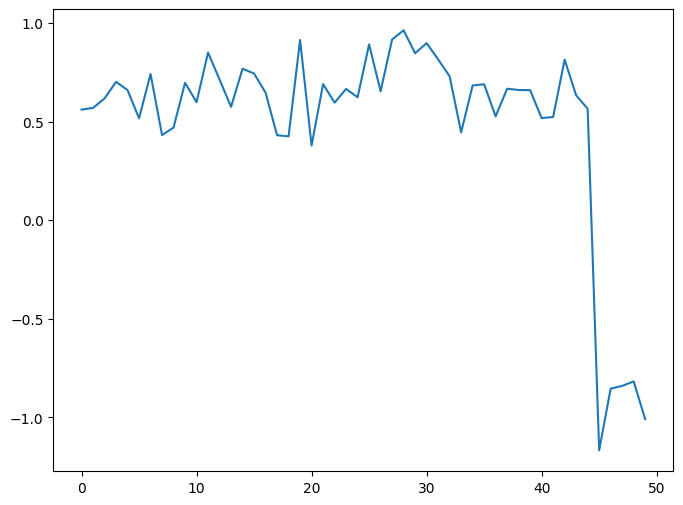

In [ ]:
plt.plot(range(m+m1),wg)
plt.show()

[[[           inf 2.67251202e-01 4.01664109e-01 ... 2.12804521e+00
   2.38153749e+00 2.53061278e+00]
  [0.00000000e+00 7.00000000e+00 4.10000000e+01 ... 2.50000000e+01
   3.00000000e+00 2.00000000e+01]]

 [[           inf 1.23339583e-01 1.39909205e-01 ... 2.61481808e+00
   2.73509128e+00 2.93207097e+00]
  [1.00000000e+00 5.00000000e+00 1.70000000e+01 ... 2.50000000e+01
   1.10000000e+01 3.10000000e+01]]

 [[           inf 2.87008994e-01 4.42365437e-01 ... 1.42163468e+00
   1.58016698e+00 1.63662561e+00]
  [2.00000000e+00 1.00000000e+01 3.50000000e+01 ... 2.30000000e+01
   7.00000000e+00 3.90000000e+01]]

 ...

 [[           inf 3.44586678e-02 5.96955082e-01 ... 1.04926074e+01
   1.05599847e+01 1.06207978e+01]
  [4.70000000e+01 4.60000000e+01 4.90000000e+01 ... 3.50000000e+01
   4.20000000e+01 3.00000000e+01]]

 [[           inf 6.22664334e-01 6.90956569e-01 ... 1.04669587e+01
   1.04879600e+01 1.05612325e+01]
  [4.80000000e+01 4.50000000e+01 4.70000000e+01 ... 3.50000000e+01
   4.20000

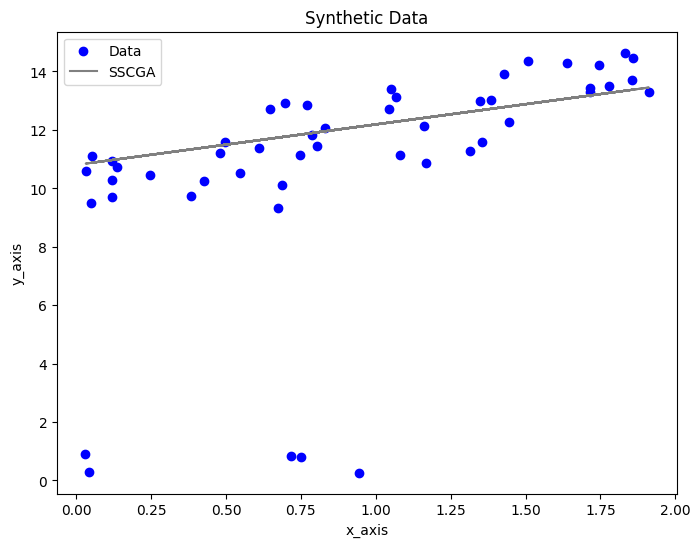

In [ ]:
#SSCGA algoirithm

o_x = np.reshape(o_x,(-1,1))
o_y = np.reshape(o_y,(-1,1))
X = np.reshape(X,(1,-1))
y = np.reshape(y,(1,-1))
data = np.vstack((X,y)).T
#計算距離
k = int(len(data)/2)
result = NearestNeighbors(n_neighbors=k)
result.fit(data)
graph = np.zeros((len(data),2,k))

for i in range(len(data)):
  a = np.array(result.kneighbors(data[i].reshape((1,-1)))[0])
  b = np.array(result.kneighbors(data[i].reshape((1,-1)))[1])
  graph[i][0],graph[i][1] = a , b
for i in range(len(data)):
  graph[i][0][0] = np.inf
for i in range(len(data)):
  for j in range(len(graph[i][1])):
    graph[i][1][j] = int(graph[i][1][j])
print(graph)


#得到的結果會是A與其他節點最短距離
def dijkstra(graph, start, k):
  INF = np.inf
  visited = []
  index = start
  nodes = dict((i, INF) for i in range(len(graph)))        # 設定節點為最大值
  nodes[start] = 0                           # 設定起點為start
  path = {i: [] for i in range(len(graph))}             # 用來存儲每個節點的路徑
  Check_node = []
  pointer = index



  while len(visited) < len(graph):                  # 有幾個節點就執行幾次
    visited.append(index)
    a = 0

    for i in graph[index][1]:
      Check_node.append(index)
      pointer = i
      new_cost = 0
      temporary_position = []
      temporary_position.append(pointer)
      while len(Check_node) != k:
        bi = 0
        for ci in graph[int(pointer)][1]:

          if ci in temporary_position:
            bi += 1
            continue
          else:
            temporary_position.append(ci)
            Check_node.append(ci)
            new_cost += graph[int(pointer)][0][int(bi)]    #新路徑距離
            pointer = ci
            break

          bi += 1
      if  new_cost < nodes[i]:             # 新路徑如果比較短
          nodes[i] = new_cost            # 採用新路徑
          path[i] = Check_node  # 更新節點的路徑

      a += 1
      Check_node = []
    next = INF
    for n in nodes:                     # 從串列中找出下一個節點
      if n in visited:                 # 如果已拜訪回到for選下一個
          continue
      if nodes[n] < next:               # 找出新的最小權重節點
          next = nodes[n]
          index = n
  return nodes , path

a_point = 8 #改變我很重要

rtn1,rtn2 = dijkstra(graph,a_point,25)

del rtn1[a_point]
del rtn2[a_point]

print(rtn1)
print(rtn2)
min_sum = min(rtn1.values())


for key, value in rtn1.items():
    if value == min_sum:
        needy = key
        break
choose = rtn2[needy]
print(choose)
print(min_sum)


ggs = np.zeros((len(choose),2))
num = 0
X = X.reshape((-1,1))
y = y.reshape((-1,1))
for i in choose:
  ggs[num][0] = X[int(i)][0]
  ggs[num][1] = y[int(i)][0]
  num += 1
ggs = ggs.T
new_x = ggs[0].reshape((-1,1))
new_y = ggs[1].reshape((-1,1))




X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1))
#Model
model_SSCGA = LinearRegression()
model_SSCGA.fit(new_x,new_y)
predict = model_SSCGA.predict(o_x)
# 計算RMSE和R²
rmse_p = np.sqrt(mean_squared_error(o_y, predict))
r2_p = r2_score(o_y, predict)

print(f'rmse:{rmse_p}')
print(f'r2:{r2_p}')
plt.scatter(X,y,c='blue',label='Data')
plt.plot(o_x,predict,c='gray',label='SSCGA')

plt.title('Synthetic Data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.legend()
plt.show()

(50, 2)
(50,)
rmse:0.8548334699949124
r2:0.6693367579150125


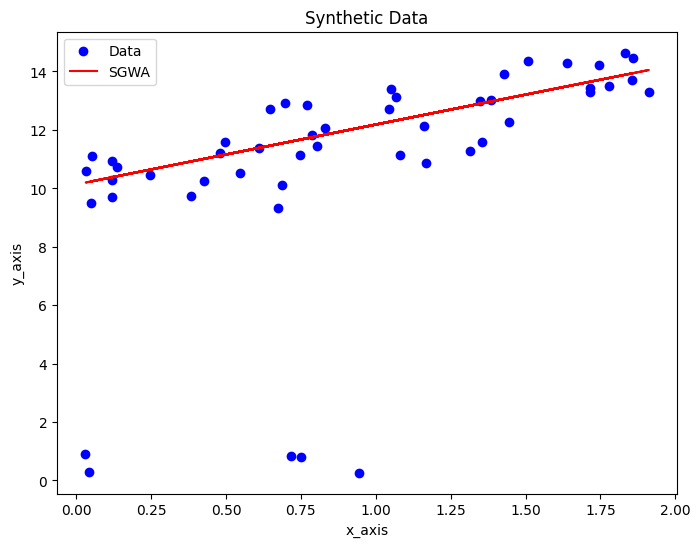

In [ ]:
#SGWA algorithm
#knn_calculate a point to other 5 points distance sum
k=6
i=0
j=1
data_dist_sum = np.zeros(m+m1)

while i < m+m1:
    while j <= k-1:
        data_dist_sum[i] = data_dist_sum[i] + result.kneighbors([data[i]])[0][0][j]
        j=j+1
    i=i+1
    j=1

#define membership function
t=0
s=0
alpha = np.zeros(m+m1)
mu = statistics.mean(data_dist_sum)
std= statistics.stdev(data_dist_sum)

while t < m+m1:
    if data_dist_sum[t] <= mu-std:
        alpha[t] = 1
    elif mu-std < data_dist_sum[t] <= mu+std:
        alpha[t] = ((mu+std) - data_dist_sum[t])/(2*std)
    else:
        alpha[t] = 0
    t=t+1

# Initial thelda --> thelda0,thelda1
thelda = np.zeros(2)

# X=[1,x0],[1,x1],...
X_p = np.array([np.ones(m+m1), x_.reshape(-1)]).T

def newFunc(params, xdata, ydata, alpha):
    x1=np.dot(xdata,params)
    return (y_-(np.dot(x1,np.diag(alpha))+ np.dot(np.diag(1-alpha),y_)))
print(np.shape(X_p))
print(np.shape(y_))
y_ = y_.flatten()

knn_fuzzy_ls_result = optimization.leastsq(newFunc, thelda, args=(X_p,y_,alpha))
knn_fuzzy_intercept = knn_fuzzy_ls_result[0][0]
knn_fuzzy_slope = knn_fuzzy_ls_result[0][1]


X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1))
#Model
model_SGWA = LinearRegression()
model_SGWA.fit(X,knn_fuzzy_slope*X + knn_fuzzy_intercept)
predict = model_SGWA.predict(o_x)
# 計算RMSE和R²
rmse_p = np.sqrt(mean_squared_error(o_y, predict))
r2_p = r2_score(o_y, predict)

print(f'rmse:{rmse_p}')
print(f'r2:{r2_p}')
plt.scatter(X,y,c='blue',label='Data')
plt.plot(o_x,predict,c='red',label='SGWA')

plt.title('Synthetic Data')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.legend()
plt.show()

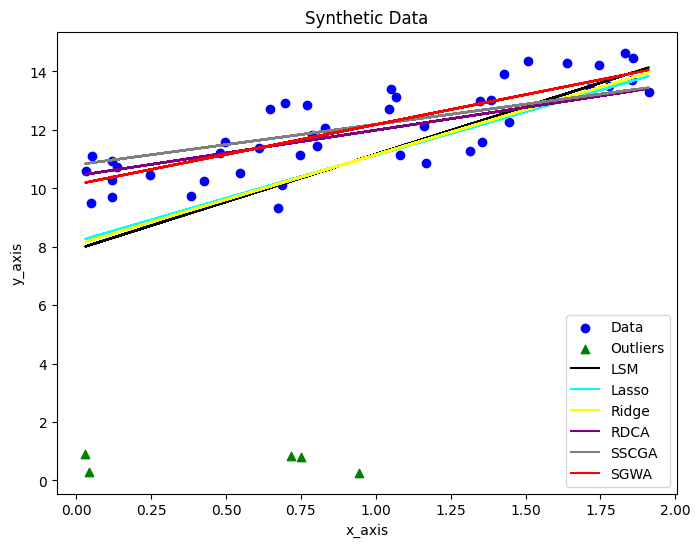

In [ ]:
plt.scatter(o_x,o_y,color= 'blue',label='Data')
plt.title('Synthetic Data')
plt.scatter(x1,y1,color ='g',marker = '^',label='Outliers')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
predict = model_LSM.predict(X)
plt.plot(X,predict,c='black',label='LSM')

predict = model_Lasso.predict(X)
plt.plot(X,predict,c='cyan',label='Lasso')
predict = model_Ridge.predict(X)
plt.plot(X,predict,c='yellow',label='Ridge')
predict = model_RDCA.predict(X)
plt.plot(X,predict,c='purple',label='RDCA')
predict = model_SSCGA.predict(X)
plt.plot(X,predict,c='gray',label='SSCGA')
predict = model_SGWA.predict(X)
plt.plot(X,predict,c='red',label='SGWA')

plt.legend()
plt.show()


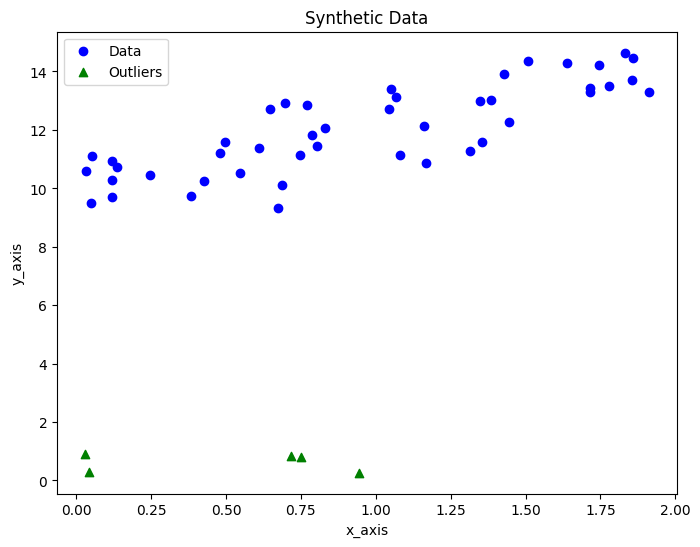

In [ ]:
plt.scatter(o_x,o_y,color= 'blue',label='Data')
plt.title('Synthetic Data')
plt.scatter(x1,y1,color ='g',marker = '^',label='Outliers')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.legend()
plt.show()

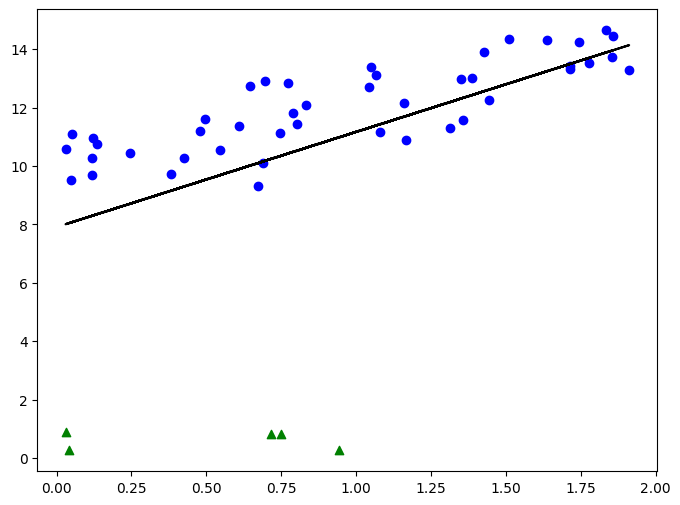

In [ ]:
plt.scatter(o_x,o_y,color= 'blue',label='Data')
predict = model_LSM.predict(X)
plt.plot(X,predict,c='black',label='LSM')
plt.scatter(x1,y1,color ='g',marker = '^',label='Outliers')


In [ ]:
predict = model_LSM.predict(o_x)
print(f"LSM:{metrics.mean_absolute_percentage_error(o_y,predict)}")
predict = model_Lasso.predict(o_x)
print(f"Lasso:{metrics.mean_absolute_percentage_error(o_y,predict)}")
predict = model_Ridge.predict(o_x)
print(f"Ridge:{metrics.mean_absolute_percentage_error(o_y,predict)}")
predict = model_RDCA.predict(o_x)
print(f"RDCA:{metrics.mean_absolute_percentage_error(o_y,predict)}")
predict = model_SSCGA.predict(o_x)
print(f"SSCGA:{metrics.mean_absolute_percentage_error(o_y,predict)}")
predict = model_SGWA.predict(o_x)
print(f"SGWA:{metrics.mean_absolute_percentage_error(o_y,predict)}")

LSM:0.10556542320526334
Lasso:0.10055659718699085
Ridge:0.10209168330454191
RDCA:0.06328434868259163
SSCGA:0.06748542438061106
SGWA:0.06008856841174141
